# Projeto: Análise e Predição de Churn de acordo com o perfil de clientes
<p align="center">
  <img src="telco.jpeg" >
</p>
**Churn é um grande problema para empresas de telecomunicação**. Com concorrência acirrada, adoção de novas (e custosas) tecnologias e altos custos de manutenção manter sua base de clientes é primordial para se manter relevante no mercado. Saber quais clientes podem deixar de assinar seus serviços pode evitar um churn em massa que pode desestabilizar suas operações.

Este projeto visa analizar os clientes usando as várias técnicas aprendidas no curso de MBA de Data Science and Analytics do PECEGE - USP. As técnicas que pretendo usar aqui são:

- Análise Exploratória de Dados
- Clustering
- PCA (Principal Components Analysis)
- MCA (Multiple Correspondence Analysis)
- Modelo Preditivo

Para começar, vamos estudar nossos dados vendo suas características.

Temos uma base de dados com 7043 linhas e 21 colunas distintas:
- Customer ID: Identificação de clientes, todas linhas únicas.
- Gender: Genero biológico da pessoa (Homem ou Mulher)
- SeniorCitizen: Se a pessoa é idosa (0 para não 1 para sim)
- Partner: Se a pessoa tem um parceiro/a (0 para não 1 para sim)
- Dependents: Se a pessoa tem dependentes (Yes or No)
- Tenure: A quantos meses o cliente é assinante
- PhoneService: Se a pessoa tem serviço de telefone ou não (Yes or No)
- Multiple Lines: Se a pessoa tem mais de uma linha (Yes, No or No Phone Service)
- Internet Service: Se a pessoa assina internet (DSL, Fiber Optic, No)
- OnlineSecurity: se ela assina o serviço de segurança online (Yes, No, No internet service)
- OnlineBackup: Se o cliente tem serviço de backup online (Yes, No, No internet service)
- DeviceProtection: Se o cliente tem proteção para seu dispositivo (Yes, No, No internet service)
- TechSupport: Se o cliente assina o suporte técnico (Yes, No, No internet service)
- StreamingTV: Se o cliente assina o serviço de streaming de TV (Yes, No, No internet service)
- StreamingMovies: Se o cliente assina o serviço de streaming de filmes (Yes, No, No internet service)
- Contract: Qual o tipo de contrato o cliente tem (mês a mês, um ano, dois anos)
- Paperless Billing: Se o cliente optou por faturas eletrônicas (Yes or No)
- PaymentMethod: Método de pagamento ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)')
- MonthCharges: Custos mensais do cliente
- TotalCharges: Custos totais do cliente
- Churn: Se o cliente saiu da empresa ou não, nossa variável alvo

Vamos dar uma olhada no resumo desses dados


In [103]:
import pandas as pd
import csv
import collections, numpy

df = pd.read_csv('churn.csv')

df.head()
df.describe()
df['Contract'].unique()
df['PaymentMethod'].unique()
#df.isna().sum()

print('\nPorcentagem de Homens: %', (df['gender'].value_counts()[0]*100)/df['gender'].count())
print('\nPorcentagem de Idosos: %', (df['SeniorCitizen'].value_counts()[1]*100)/df['SeniorCitizen'].count())
print('\nPorcentagem de Pessoas com Parceiros: %', (df['Partner'].value_counts()[1]*100)/df['Partner'].count())
print('\nPorcentagem de Pessoas com Dependentes: %', (df['Dependents'].value_counts()[1]*100)/df['Dependents'].count())
print('\nPorcentagem de Churn: %', (df['Churn'].value_counts()[1]*100)/df['Churn'].count())



Porcentagem de Homens: % 50.475649581144395

Porcentagem de Idosos: % 16.21468124378816

Porcentagem de Pessoas com Parceiros: % 48.30327985233565

Porcentagem de Pessoas com Dependentes: % 29.95882436461735

Porcentagem de Churn: % 26.536987079369588


Não temos linhas sem valores, então não precisamos remediar isso na nossa base de dados.
Vamos ver a distribuição de valores de nossas variáveis por meio de histogramas.

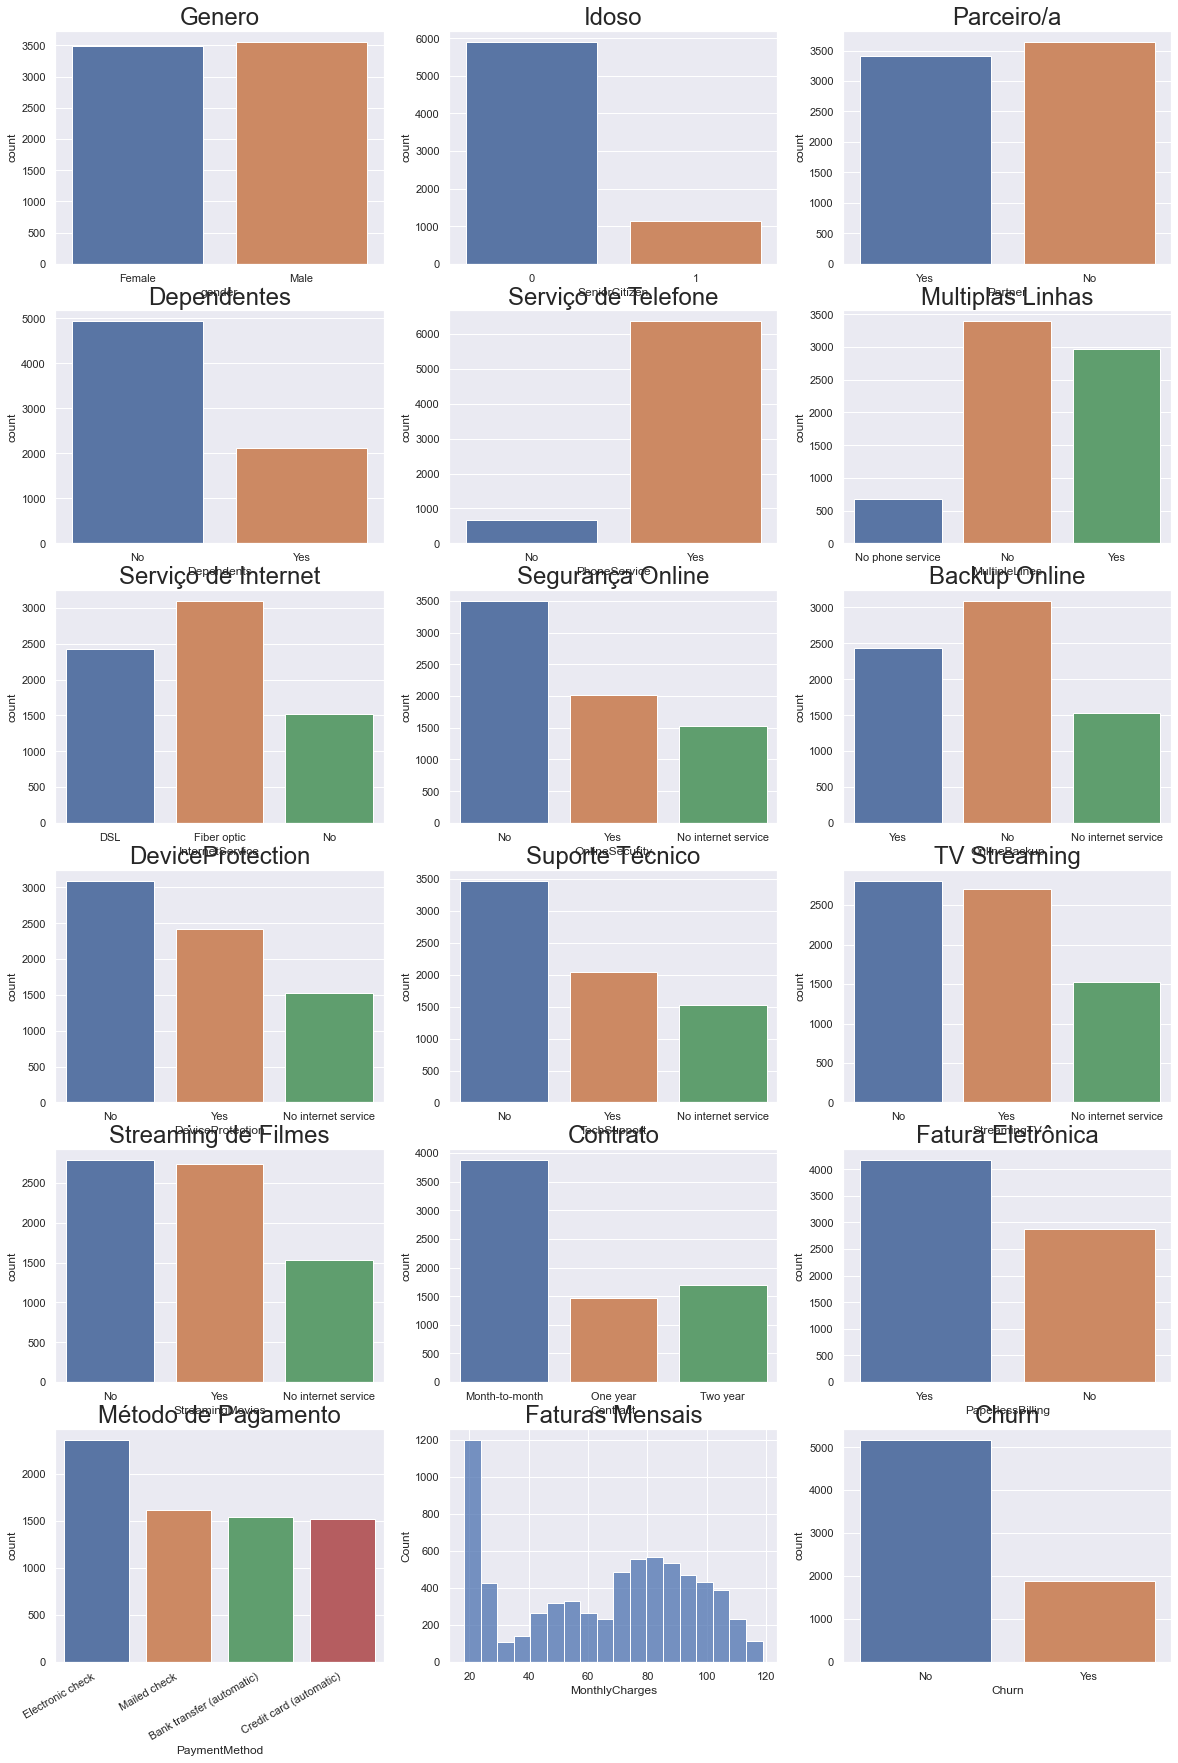

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 6, ncols = 3)

sns.countplot(data = df, x = 'gender', ax=ax[0][0])
ax[0][0].set_title('Genero',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'SeniorCitizen', ax=ax[0][1])
ax[0][1].set_title('Idoso',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Partner', ax=ax[0][2])
ax[0][2].set_title('Parceiro/a',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Dependents', ax=ax[1][0])
ax[1][0].set_title('Dependentes',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'PhoneService', ax=ax[1][1])
ax[1][1].set_title('Serviço de Telefone',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'MultipleLines', ax=ax[1][2])
ax[1][2].set_title('Multiplas Linhas',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'InternetService', ax=ax[2][0])
ax[2][0].set_title('Serviço de Internet',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'OnlineSecurity', ax=ax[2][1])
ax[2][1].set_title('Segurança Online',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'OnlineBackup', ax=ax[2][2])
ax[2][2].set_title('Backup Online',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'DeviceProtection', ax=ax[3][0])
ax[3][0].set_title('DeviceProtection',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'TechSupport', ax=ax[3][1])
ax[3][1].set_title('Suporte Técnico',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'StreamingTV', ax=ax[3][2])
ax[3][2].set_title('TV Streaming',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'StreamingMovies', ax=ax[4][0])
ax[4][0].set_title('Streaming de Filmes',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Contract', ax=ax[4][1])
ax[4][1].set_title('Contrato',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'PaperlessBilling', ax=ax[4][2])
ax[4][2].set_title('Fatura Eletrônica',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'PaymentMethod', ax=ax[5][0])
labels = df['PaymentMethod'].unique()
ax[5][0].set_title('Método de Pagamento',fontdict= {'fontsize': 24})
ax[5][0].set_xticklabels(labels,rotation=30, ha= 'right')
sns.histplot(data = df, x = 'MonthlyCharges', ax=ax[5][1])
ax[5][1].set_title('Faturas Mensais',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Churn', ax=ax[5][2])
ax[5][2].set_title('Churn',fontdict= {'fontsize': 24})

sns.set(rc={'figure.figsize':(20,30)})

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 2, ncols = 2)

sns.countplot(data = df, x = 'tenure', ax=ax[0][0])
ax[0][0].set_title('Meses Cliente',fontdict= {'fontsize': 24})
sns.histplot(data = df, x = 'TotalCharges', ax=ax[0][1], bins=10)
ax[0][1].set_title('Faturamento Total',fontdict= {'fontsize': 24})

sns.set(rc={'figure.figsize':(50,35)})

Error in callback <function flush_figures at 0x00000244B59BC3A0> (for post_execute):


KeyboardInterrupt: 

TypeError: Neither the `x` nor `y` variable appears to be numeric.

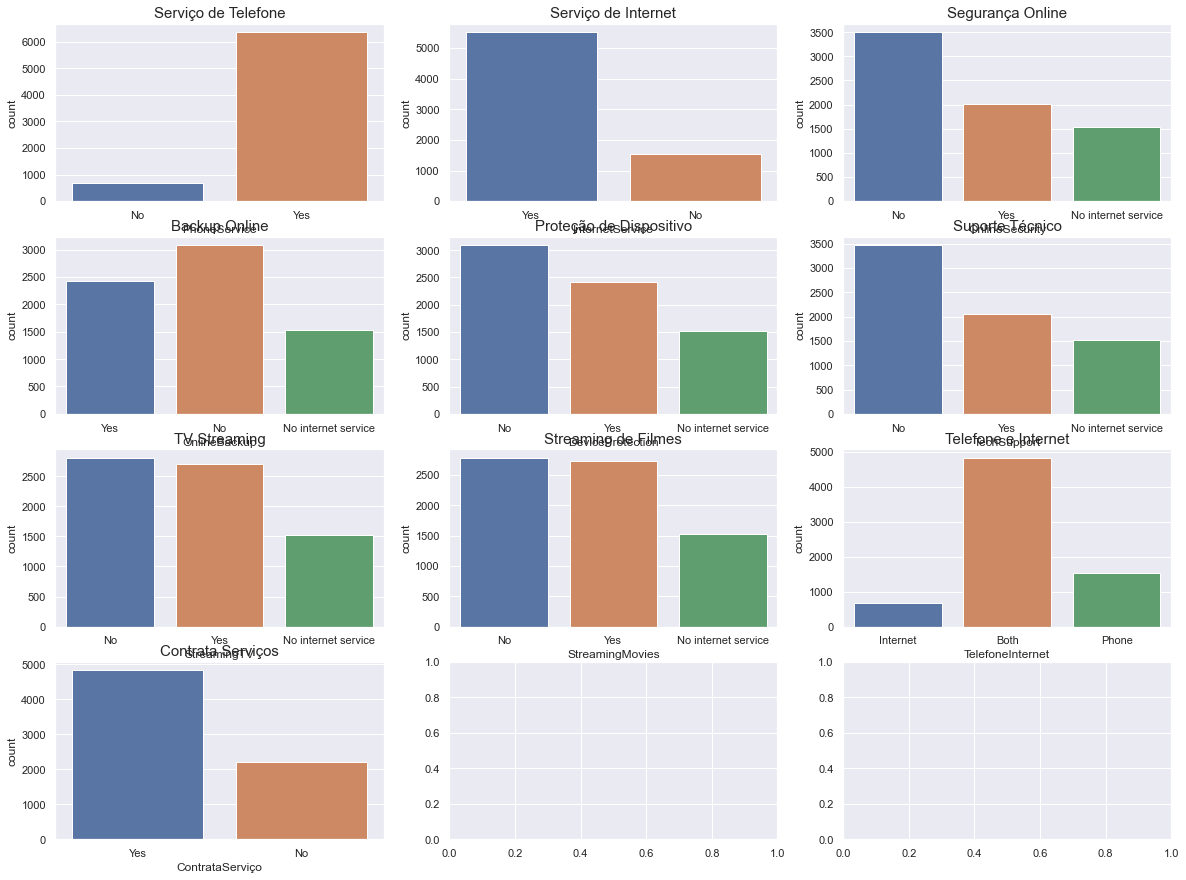

In [102]:
#- PhoneService: Se a pessoa tem serviço de telefone ou não (Yes or No)
#- Internet Service: Se a pessoa assina internet (DSL, Fiber Optic, No)
#- OnlineSecurity: se ela assina o serviço de segurança online (Yes, No, No internet service)
#- OnlineBackup: Se o cliente tem serviço de backup online (Yes, No, No internet service)
#- DeviceProtection: Se o cliente tem proteção para seu dispositivo (Yes, No, No internet service)
#- TechSupport: Se o cliente assina o suporte técnico (Yes, No, No internet service)
#- StreamingTV: Se o cliente assina o serviço de streaming de TV (Yes, No, No internet service)
#- StreamingMovies: Se o cliente assina o serviço de streaming de filmes (Yes, No, No internet service)

import seaborn as sns
import matplotlib.pyplot as plt

produtos = df.copy(deep=True)
produtos = produtos.replace(['DSL','Fiber optic'],'Yes')
produtos = produtos.drop(['gender','SeniorCitizen','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'],axis=1)

def internet_e_telefone(row):
    if row['InternetService'] == 'Yes' and row['PhoneService'] == 'Yes':
        val = 'Both'
    if row['InternetService'] == 'No' and row['PhoneService'] == 'Yes':
        val = 'Phone'
    if row['InternetService'] == 'Yes' and row['PhoneService'] == 'No':
        val = 'Internet'
    return val

def servico_extra(row):
    val = 'No'
    if row['OnlineSecurity'] == 'Yes' or row['OnlineBackup'] == 'Yes' or row['DeviceProtection'] == 'Yes' or row['TechSupport'] == 'Yes' or row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes':
        val = 'Yes'
    return val


produtos['TelefoneInternet'] = produtos.apply(internet_e_telefone,axis=1)
produtos['ContrataServiço'] = produtos.apply(servico_extra,axis=1)


fig , ax = plt.subplots(nrows = 4, ncols = 3)
font_size = 15
sns.countplot(data = produtos, x = 'PhoneService', ax=ax[0][0])
ax[0][0].set_title('Serviço de Telefone',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'InternetService', ax=ax[0][1])
ax[0][1].set_title('Serviço de Internet',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'OnlineSecurity', ax=ax[0][2])
ax[0][2].set_title('Segurança Online',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'OnlineBackup', ax=ax[1][0])
ax[1][0].set_title('Backup Online',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'DeviceProtection', ax=ax[1][1])
ax[1][1].set_title('Proteção de Dispositivo',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'TechSupport', ax=ax[1][2])
ax[1][2].set_title('Suporte Técnico',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'StreamingTV', ax=ax[2][0])
ax[2][0].set_title('TV Streaming',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'StreamingMovies', ax=ax[2][1])
ax[2][1].set_title('Streaming de Filmes',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'TelefoneInternet', ax=ax[2][2])
ax[2][2].set_title('Telefone e Internet',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'ContrataServiço', ax=ax[3][0])
ax[3][0].set_title('Contrata Serviços',fontdict= {'fontsize': font_size})
sns.barplot(x="PhoneService",y="Churn",data=df,ax=ax[3][1])
ax[3][1].set_title('Serviços de Tel. Vs Churn',fontdict= {'fontsize': font_size})
sns.barplot(x="InternetService",y="Churn",data=df,ax=ax[3][2])
ax[3][2].set_title('Serviços de Net. Vs Churn',fontdict= {'fontsize': font_size})

ax[0][2].set_ylim(bottom = 0, top = 4000)
ax[1][0].set_ylim(bottom = 0, top = 4000)
ax[1][1].set_ylim(bottom = 0, top = 4000)
ax[1][2].set_ylim(bottom = 0, top = 4000)
ax[2][0].set_ylim(bottom = 0, top = 4000)
ax[2][1].set_ylim(bottom = 0, top = 4000)


sns.set(rc={'figure.figsize':(20,15)})

Temos muitos dados interessantes em nossa base! É possível tirar vários insights!


Para melhor organizar as idéias, vamos usar bullet points:
- Os assinantes do serviço são homens, porém com uma pequena margem de vantagem (50,48% de homens);
- Uma pequena parcela dos assinantes são idosos (16%);
- Quase metade dos assinantes tem parceiros (48%);
- Os assinantes com dependentes fazem 30% da base de clientes.
- O serviço de telefonia é o produto mais popular;
- A maioria das pessoas assina a internet e o serviço de telefonia simultâneamente;
- Dos que contratam o serviço de Internet, a grande maioria contrata serviços adicionais como Streaming, Backup Online, etc...
- O serviço mais popular é o de Streaming de TV e Filmes e o menos popular é o de Segurança Online;
- Tivemos um Churn de **26%** neste mês, ou seja, 1/4 de nossa base de clientes foi embora em um mês!!